In [2]:
# DATASET : https://www.kaggle.com/datasets/alessiocorrado99/animals10

In [3]:
# usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [4]:
path_image = './animals/used'

In [5]:

# Buat model VGG16 (tanpa lapisan terakhir/final layer)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Membekukan lapisan-lapisan model VGG16 agar tidak terlatih
for layer in vgg_model.layers:
    layer.trainable = False

In [6]:
augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2,
)

train_data = augmentation.flow_from_directory(
    path_image,
    target_size=(150, 150),
    class_mode='categorical',
    subset='training'
)

validation_data = augmentation.flow_from_directory(
    path_image,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation'
)

labels = list(train_data.class_indices)

print(f'List of label : {list(train_data.class_indices)}')

Found 10227 images belonging to 3 classes.
Found 2555 images belonging to 3 classes.
List of label : ['cane', 'gallina', 'ragno']


In [10]:
ACCURACY_TRESHOLD = 95e-2


class CallbackTraining(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        v_accuracy = logs.get('val_accuracy')
        accuracy = logs.get('accuracy')
        if accuracy >= ACCURACY_TRESHOLD and v_accuracy >= ACCURACY_TRESHOLD:
            print(
                f'\n Epoch {epoch}\n Accuracy has reach = {logs["accuracy"]*100:.2f}%/n training has been stopped.')
            self.model.stop_training = True


early_stop_callback = EarlyStopping(
    monitor='val_accuracy',
    patience=100,
    restore_best_weights=True
)

In [11]:
# Buat model VGG16 (tanpa lapisan terakhir/final layer)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Membekukan lapisan-lapisan model VGG16 agar tidak terlatih
for layer in vgg_model.layers:
    layer.trainable = False

model_3 = tf.keras.models.Sequential([
    vgg_model,
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# count loss function and optimizer
model_3.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.legacy.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# train data
history = model_3.fit(
    train_data,
    epochs=100,
    validation_data=validation_data,
    validation_steps=4,
    verbose=1,
    shuffle=True,
    callbacks=[CallbackTraining(),early_stop_callback]
)

Epoch 1/100
320/320 [==============================] - 2380s 7s/step - loss: 0.3613 - accuracy: 0.8518 - val_loss: 0.4110 - val_accuracy: 0.8125
Epoch 2/100
320/320 [==============================] - 2092s 7s/step - loss: 0.2608 - accuracy: 0.8986 - val_loss: 0.2531 - val_accuracy: 0.9062
Epoch 3/100
320/320 [==============================] - 2081s 6s/step - loss: 0.2262 - accuracy: 0.9095 - val_loss: 0.2047 - val_accuracy: 0.9453
Epoch 4/100
320/320 [==============================] - 1902s 6s/step - loss: 0.2107 - accuracy: 0.9168 - val_loss: 0.2291 - val_accuracy: 0.8984
Epoch 5/100
320/320 [==============================] - 887s 3s/step - loss: 0.1960 - accuracy: 0.9227 - val_loss: 0.3256 - val_accuracy: 0.8672
Epoch 6/100
320/320 [==============================] - 887s 3s/step - loss: 0.1813 - accuracy: 0.9307 - val_loss: 0.2334 - val_accuracy: 0.8906
Epoch 7/100
320/320 [==============================] - 887s 3s/step - loss: 0.1673 - accuracy: 0.9363 - val_loss: 0.2685 - val_accur

In [15]:
file_name = 'model_anjing_ayam_laba2.keras'
model_3.save(file_name)

converter = tf.lite.TFLiteConverter.from_keras_model(model_3)
tflite_model = converter.convert()
 
 
with tf.io.gfile.GFile('model_anjing_ayam_laba2.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/45/8ksqghhx247_vvwdc672hb840000gn/T/tmp144gj7c3/assets


INFO:tensorflow:Assets written to: /var/folders/45/8ksqghhx247_vvwdc672hb840000gn/T/tmp144gj7c3/assets
2023-10-01 07:07:35.653934: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-10-01 07:07:35.654073: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-10-01 07:07:35.656756: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/45/8ksqghhx247_vvwdc672hb840000gn/T/tmp144gj7c3
2023-10-01 07:07:35.658728: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-10-01 07:07:35.658733: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/45/8ksqghhx247_vvwdc672hb840000gn/T/tmp144gj7c3
2023-10-01 07:07:35.665735: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-10-01 07:07:35.667995: I tensorflow/cc/saved_model/load

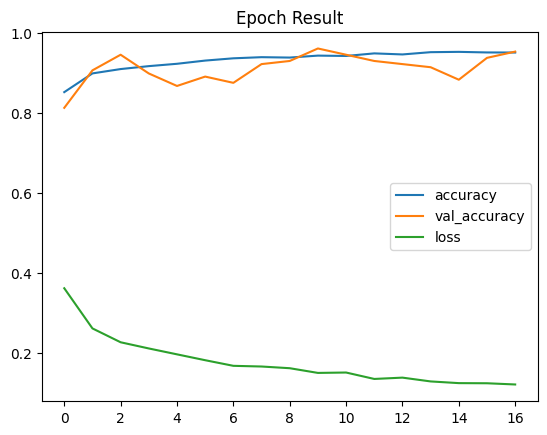

In [21]:
plt.title("Epoch Result")
plt.plot(history.history.get('accuracy'))
plt.plot(history.history.get('val_accuracy'))
plt.plot(history.history.get('loss'))
plt.legend(['accuracy','val_accuracy','loss'])
plt.show()